Load data for I01 (methyleneimmonium)

In [1]:
import xarray as xr

import shnitsel as st
import shnitsel.xarray

xr.set_options(display_expand_coords=False, display_expand_data_vars=False, display_expand_attrs=False)

In [2]:
# frames = st.read('/nc/data/reparse_2025-12-17/I01_ch2nh2.nc').st.to_frames()
# frames

In [3]:
frames = st.read('/nc/data/frames_2026-01-12/I01_ch2nh2.nc')

INFO: Identified the path `/nc/data/frames_2026-01-12/I01_ch2nh2.nc` to be of format `shnitsel`.
INFO: State names already assigned


In [4]:
frames.atXYZ.attrs['charge'] = +1
# frames.atXYZ.attrs['smiles_map'] = frames.atXYZ.st
frames.atXYZ.attrs['smiles_map'] = frames.atXYZ.isel(frame=0).st.smiles_map(charge=1)


In [5]:
# frames.st.write_shnitsel_file('/nc/data/frames_2026-01-12/I01_ch2nh2_.nc')

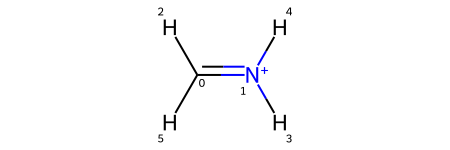

In [6]:
frames.st.default_mol(atomNote=True)

In [7]:
# Pyramidalizations at hops from S2 -> S1
pyr = frames.st.hops([(3, 2)]).atXYZ.st.get_pyramids()
pyr

<xarray.DataArray 'atXYZ' (descriptor: 2, frame: 90)> Size: 720B
array([[-0.17327356, -0.32332265,  0.11890578,  0.79445726, -1.1215111 ,
         0.5102259 , -0.30166125, -0.9615115 ,  0.6513198 ,  0.31817424,
         0.77552855,  0.9986921 , -0.5244914 , -0.9465095 ,  0.25232065,
         0.19755793,  0.21008205,  0.59840924, -0.15280068, -0.99110425,
        -0.70412266,  1.2015883 , -0.26172996, -1.0150629 ,  0.36002684,
         0.06264007,  0.4144417 , -0.40260744,  0.31849325, -1.1782035 ,
         0.87922734,  0.01782274,  1.4861405 , -0.27069092, -0.30192363,
         0.08481491,  0.23115623,  0.12838852,  0.23155248,  1.096498  ,
        -0.8290702 , -0.329674  ,  0.28831005, -0.23962998, -1.1166049 ,
         0.13964486,  0.39199603, -0.17136109,  0.35745943,  0.40023053,
        -0.06620705, -0.24553192, -0.7075654 ,  1.0265274 ,  0.5367209 ,
        -0.7034346 ,  0.06343663,  0.29907835, -0.17914784, -1.2379152 ,
        -0.14380205, -0.21708584, -0.22934806, -0.20325363,  0.60986084,
         0.25077343,  0.6113633 , -0.7936994 , -0.14326942,  0.1458664 ,
         0.02965999,  0.02032149, -0.4962107 , -0.2834047 , -0.27782595,
        -0.4936229 , -0.3553108 ,  0.3133874 , -0.38275337,  0.2082423 ,
        -0.76855147,  0.00705636,  0.4059875 ,  0.2990873 , -0.2174244 ,
        -0.01430285, -0.75341666, -0.6420733 , -0.27311814, -0.3181522 ],
       [-0.18366182, -0.32356262,  0.04043615, -0.76236904,  1.1451764 ,
         0.10982001, -0.7846948 ,  0.9760359 , -0.5564121 , -0.34665   ,
        -0.8359319 , -1.2224747 , -1.0998787 ,  1.1950725 ,  0.41481948,
         0.13234699,  0.2983688 ,  1.1742662 , -0.31953967,  1.0695616 ,
        -0.02418697, -1.2135719 , -0.13515198,  0.5811397 ,  0.20981395,
         0.66447407, -1.2477828 ,  0.18198037,  0.40057766,  0.01034594,
        -0.2862624 ,  1.2651784 ,  0.18374884,  0.84085715, -0.49058592,
         0.36634016, -0.2136879 ,  1.3219099 , -0.59104455, -0.88969696,
        -0.87979853, -0.1756934 ,  1.1355934 ,  0.1485771 , -1.3808676 ,
        -1.3398827 ,  0.01076019, -0.02926183,  0.19771886, -0.5181433 ,
        -0.8668817 ,  0.09342158,  1.0590713 ,  0.35503292, -0.03172755,
        -1.003537  ,  0.15494919, -1.0805773 , -0.02139246,  0.46014416,
        -0.14320982, -0.80446684, -1.1349026 , -0.4504856 , -0.05108356,
         0.31873   , -0.7808596 ,  1.1855426 , -0.08720136, -0.22273386,
         0.54555273, -0.1353389 ,  0.1699872 ,  1.2399449 , -0.41970742,
         0.3575325 , -0.14643371, -1.0278791 ,  0.08129644,  0.0232054 ,
        -0.79350865,  0.34085715, -0.2271651 ,  1.4551536 ,  0.51659405,
        -0.05929041,  0.33284974,  1.1285129 , -0.09403455,  0.30657172]],
      dtype=float32)
Coordinates: (10)
Dimensions without coordinates: descriptor

We want the pyramidalization angle $\chi_{1,0}^{3,4}$:

In [25]:
pyr.sel(descriptor=(pyr.atoms=={1,0,3,4}))

<xarray.DataArray 'atXYZ' (descriptor: 1, frame: 90)> Size: 360B
array([[-0.18366182, -0.32356262,  0.04043615, -0.76236904,  1.1451764 ,
         0.10982001, -0.7846948 ,  0.9760359 , -0.5564121 , -0.34665   ,
        -0.8359319 , -1.2224747 , -1.0998787 ,  1.1950725 ,  0.41481948,
         0.13234699,  0.2983688 ,  1.1742662 , -0.31953967,  1.0695616 ,
        -0.02418697, -1.2135719 , -0.13515198,  0.5811397 ,  0.20981395,
         0.66447407, -1.2477828 ,  0.18198037,  0.40057766,  0.01034594,
        -0.2862624 ,  1.2651784 ,  0.18374884,  0.84085715, -0.49058592,
         0.36634016, -0.2136879 ,  1.3219099 , -0.59104455, -0.88969696,
        -0.87979853, -0.1756934 ,  1.1355934 ,  0.1485771 , -1.3808676 ,
        -1.3398827 ,  0.01076019, -0.02926183,  0.19771886, -0.5181433 ,
        -0.8668817 ,  0.09342158,  1.0590713 ,  0.35503292, -0.03172755,
        -1.003537  ,  0.15494919, -1.0805773 , -0.02139246,  0.46014416,
        -0.14320982, -0.80446684, -1.1349026 , -0.4504856 , -0.05108356,
         0.31873   , -0.7808596 ,  1.1855426 , -0.08720136, -0.22273386,
         0.54555273, -0.1353389 ,  0.1699872 ,  1.2399449 , -0.41970742,
         0.3575325 , -0.14643371, -1.0278791 ,  0.08129644,  0.0232054 ,
        -0.79350865,  0.34085715, -0.2271651 ,  1.4551536 ,  0.51659405,
        -0.05929041,  0.33284974,  1.1285129 , -0.09403455,  0.30657172]],
      dtype=float32)
Coordinates: (10)
Dimensions without coordinates: descriptor

In [8]:
pyr1 = pyr.sel(descriptor_tex='$\\chi_{1,0}^{3,4}$')
pyr1

<xarray.DataArray 'atXYZ' (frame: 90)> Size: 360B
array([-0.18366182, -0.32356262,  0.04043615, -0.76236904,  1.1451764 ,
        0.10982001, -0.7846948 ,  0.9760359 , -0.5564121 , -0.34665   ,
       -0.8359319 , -1.2224747 , -1.0998787 ,  1.1950725 ,  0.41481948,
        0.13234699,  0.2983688 ,  1.1742662 , -0.31953967,  1.0695616 ,
       -0.02418697, -1.2135719 , -0.13515198,  0.5811397 ,  0.20981395,
        0.66447407, -1.2477828 ,  0.18198037,  0.40057766,  0.01034594,
       -0.2862624 ,  1.2651784 ,  0.18374884,  0.84085715, -0.49058592,
        0.36634016, -0.2136879 ,  1.3219099 , -0.59104455, -0.88969696,
       -0.87979853, -0.1756934 ,  1.1355934 ,  0.1485771 , -1.3808676 ,
       -1.3398827 ,  0.01076019, -0.02926183,  0.19771886, -0.5181433 ,
       -0.8668817 ,  0.09342158,  1.0590713 ,  0.35503292, -0.03172755,
       -1.003537  ,  0.15494919, -1.0805773 , -0.02139246,  0.46014416,
       -0.14320982, -0.80446684, -1.1349026 , -0.4504856 , -0.05108356,
        0.31873   , -0.7808596 ,  1.1855426 , -0.08720136, -0.22273386,
        0.54555273, -0.1353389 ,  0.1699872 ,  1.2399449 , -0.41970742,
        0.3575325 , -0.14643371, -1.0278791 ,  0.08129644,  0.0232054 ,
       -0.79350865,  0.34085715, -0.2271651 ,  1.4551536 ,  0.51659405,
       -0.05929041,  0.33284974,  1.1285129 , -0.09403455,  0.30657172],
      dtype=float32)
Coordinates: (9)

In [9]:
# Dihedrals at hops S1 -> S0
dih = frames.st.hops([(2, 1)]).atXYZ.st.get_bond_torsions(ang='deg', signed=True)
dih

<xarray.DataArray 'atXYZ' (descriptor: 4, frame: 76)> Size: 1kB
array([[-7.95507050e+01, -9.31048660e+01, -5.06227226e+01,
         3.30154381e+01,  1.07749741e+02, -7.46353760e+01,
         6.97563248e+01,  3.01450977e+01, -7.93992462e+01,
        -1.29539291e+02, -3.13250580e+01,  6.88488541e+01,
        -2.32000713e+01, -4.35536919e+01, -3.75718918e+01,
        -7.07882843e+01,  9.49191666e+01,  1.47367828e+02,
         2.91295853e+01, -2.74454594e+01, -4.60158234e+01,
         1.17937004e+02,  1.39256945e+01, -1.01469162e+02,
         1.46661560e+02,  1.09521805e+02, -6.34726753e+01,
         1.11552422e+02,  4.01440964e+01,  5.51961670e+01,
        -7.85222960e+00, -9.28196640e+01, -1.40378799e+02,
         1.60540676e+01, -5.60740318e+01,  1.60531433e+02,
        -8.88979416e+01, -1.23306717e+02,  1.01993256e+02,
        -9.26320343e+01, -4.68902321e+01, -1.06732742e+02,
        -1.09388405e+02,  1.27956482e+02, -1.16073944e+02,
        -6.10676689e+01,  9.93315277e+01, -5.19738045e+01,
         1.14635437e+02, -6.37182541e+01, -4.23497543e+01,
        -8.57400131e+01, -1.47086916e+01, -1.64719543e+02,
        -1.05074852e+02,  1.55805038e+02, -8.00953217e+01,
         1.52048920e+02,  1.19415863e+02,  1.12084103e+01,
...
        -6.60968933e+01, -1.44378235e+02, -1.46818485e+01,
         7.54149628e+01,  7.46435699e+01,  1.01886635e+02,
         5.59245071e+01,  8.34287720e+01, -4.92754250e+01,
         7.30070648e+01,  1.53312897e+02,  1.31600372e+02,
        -9.54242096e+01, -7.11232758e+01,  6.11004295e+01,
         1.58643692e+02, -1.20068581e+02,  8.10216370e+01,
        -1.10259697e+02,  1.55702499e+02,  7.58036041e+01,
         1.01837524e+02, -1.64015396e+02, -7.69627533e+01,
        -7.95027618e+01,  6.14898834e+01, -9.29451523e+01,
        -7.17497101e+01, -9.15584259e+01, -1.40133652e+02,
         6.06317253e+01, -1.29533890e+02,  1.23961052e+02,
        -8.55279694e+01, -7.18171997e+01,  3.67650070e+01,
        -1.02801773e+02,  3.88042374e+01, -9.71948624e+01,
         1.64892410e+02,  5.07632208e+00, -1.19107300e+02,
        -1.08753960e+02, -5.09319973e+00, -7.02218552e+01,
         9.18906174e+01,  8.95448532e+01,  1.65459045e+02,
         4.19468956e+01,  2.05385113e+01,  1.02038240e+01,
        -3.71364326e+01, -1.11775978e+02,  9.82979279e+01,
        -9.18337936e+01,  1.27902016e+02, -5.38456955e+01,
        -1.00293381e+02]], dtype=float32)
Coordinates: (16)
Dimensions without coordinates: descriptor
Attributes: (5)

Text(0.5, 0.01, 'angle / °')

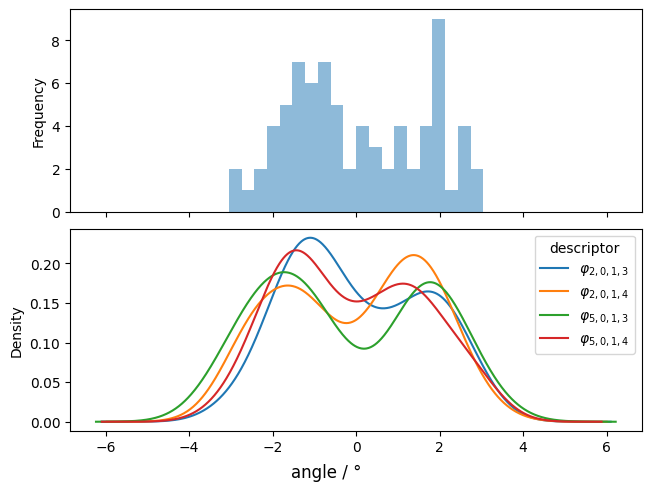

In [20]:
import matplotlib.pyplot as plt

df = dih.swap_dims(descriptor='descriptor_tex').rename(descriptor_tex='descriptor')\
        .transpose(..., 'descriptor').to_pandas()

fig, axs = plt.subplots(2, 1, sharex=True, layout='constrained')
df.iloc[:, 0].plot.hist(alpha=.5, ax=axs[0], bins=20)
df.plot.kde(ax=axs[1])
fig.supxlabel('angle / °')
# export CSV

# .plot.hist(color='descriptor')